<a href="https://colab.research.google.com/github/Brajo280603/learning_ml/blob/main/magic_dataset_tutorial_fcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries




In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

[dataset link](https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope)

# Creating Pandas Dataframe from dataSet

In [13]:
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data",names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [14]:
df["class"] = (df["class"] == "g").astype(int) # compares each row , if found as g , set as true(1) , if not set as false(0)

In [16]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


# Plotting the data Informations


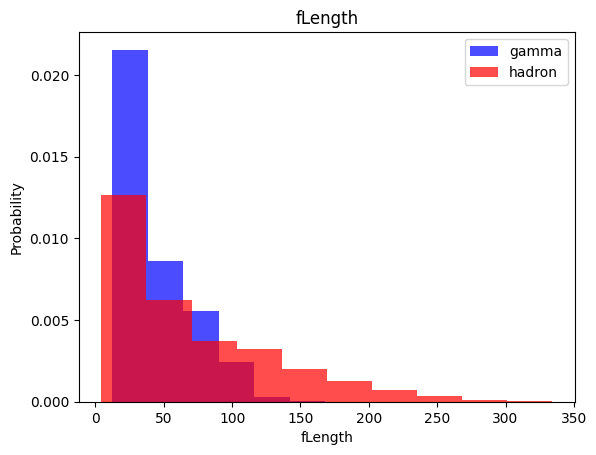

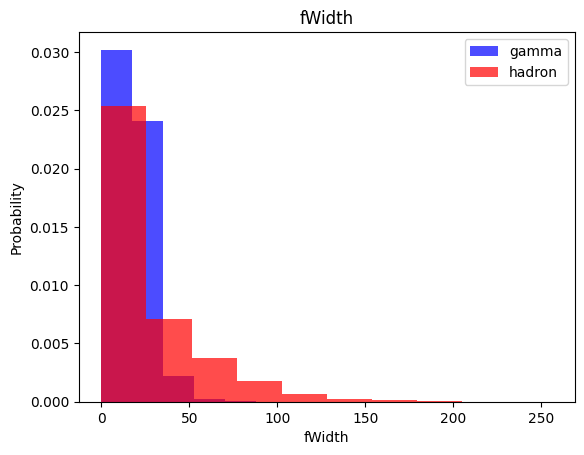

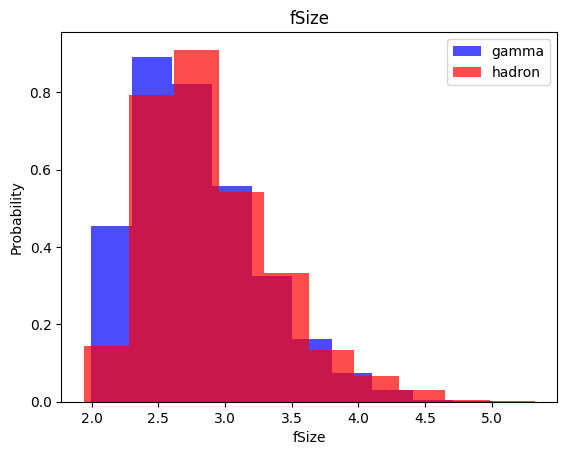

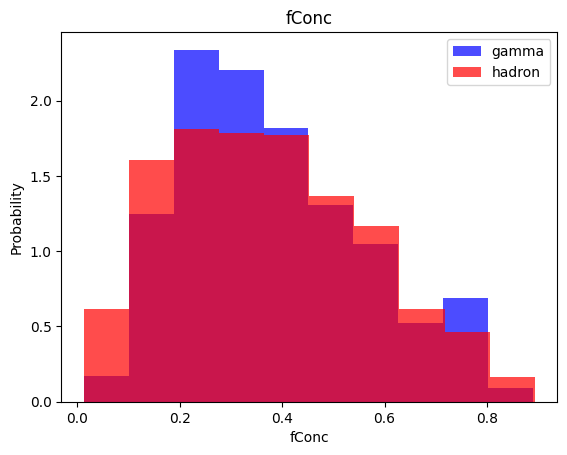

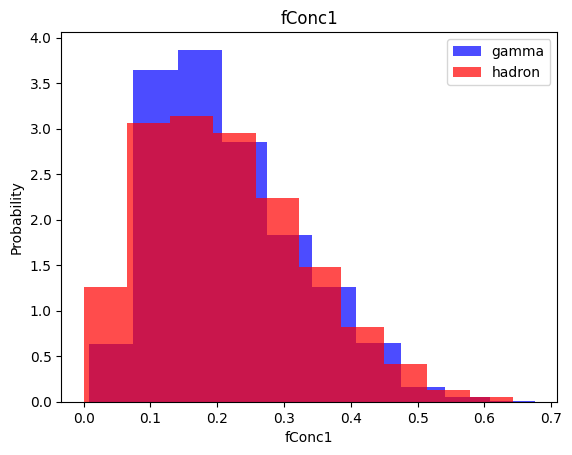

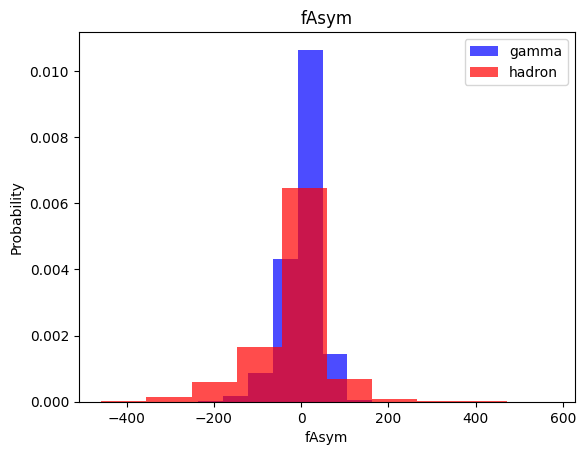

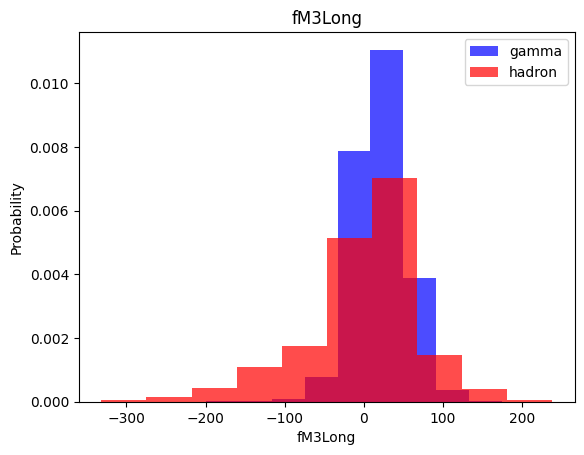

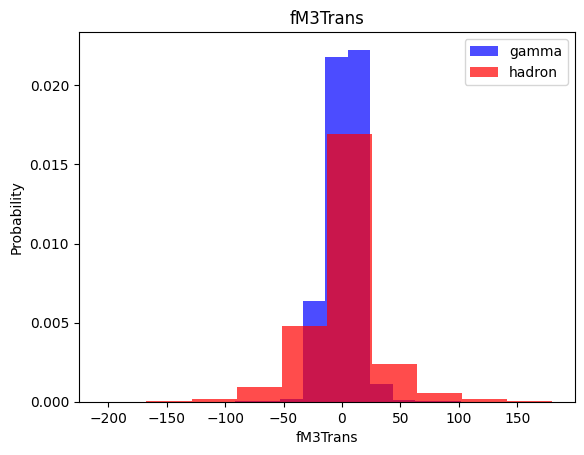

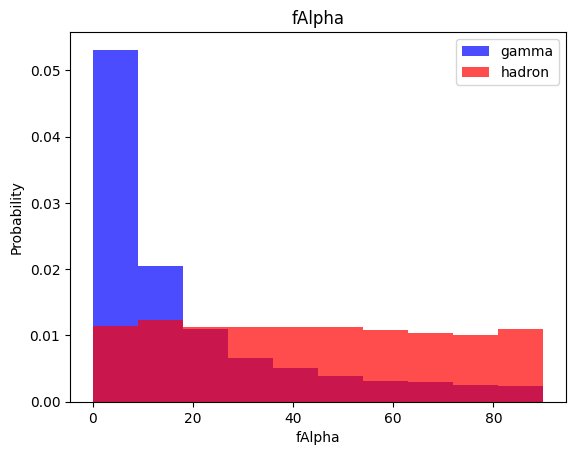

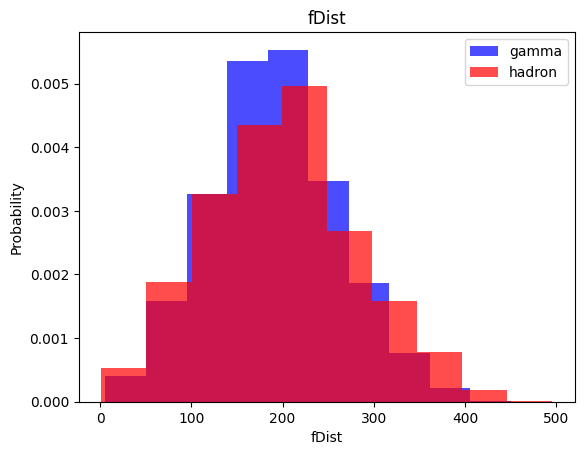

In [20]:
for label in cols[:-1]:
  plt.hist(df[df["class"] == 1][label],color='blue', label='gamma',alpha=0.7,density=True)
  plt.hist(df[df["class"] == 0][label],color='red', label='hadron',alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


# creating Training, Validation and Testing Dataset and normalization


In [66]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [44]:
def scale_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x,y)

  data = np.hstack((x,np.reshape(y,(-1,1))))

  return data, x, y

In [67]:
train, x_train, y_train = scale_dataset(train, True)
valid, x_valid, y_valid = scale_dataset(valid, False)
test, x_test, y_test = scale_dataset(test, False)

# K-Nearest Neighbour




In [128]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [129]:
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model = knn_model.fit(x_train,y_train)

In [130]:
y_pred = knn_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73      1349
           1       0.85      0.87      0.86      2455

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayes


In [137]:
from sklearn.naive_bayes import GaussianNB

In [138]:
nb_model = GaussianNB()

nb_model = nb_model.fit(x_train,y_train)

In [139]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.41      0.52      1349
           1       0.74      0.91      0.81      2455

    accuracy                           0.73      3804
   macro avg       0.73      0.66      0.67      3804
weighted avg       0.73      0.73      0.71      3804



# Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train,y_train)

In [136]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71      1349
           1       0.84      0.83      0.83      2455

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# Support Vector Machines (SVM)

In [140]:
from sklearn.svm import SVC

In [144]:
svm_model = SVC()

svm_model = svm_model.fit(x_train,y_train)

In [145]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1349
           1       0.88      0.90      0.89      2455

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Networks

In [146]:
import tensorflow as tf

In [159]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))
  ax1.plot(history.history["loss"],label="loss")
  ax1.plot(history.history["val_loss"],label="val_loss")
  ax1.set_xlabel("Epoch")
  ax1.set_ylabel("Binary crossentropy")
  ax1.grid(True)
  ax2.plot(history.history["accuracy"],label="accuracy")
  ax2.plot(history.history["val_accuracy"],label="val_accuracy")
  ax2.set_xlabel("Epoch")
  ax2.set_ylabel("Accuracy")
  ax2.grid(True)
  plt.show()

In [153]:
def train_model(x_train,y_train,num_nodes,dropout_prob,learning_rate,batch_size,epochs):

  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes,activation="relu",input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes,activation="relu"),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1,activation="sigmoid")
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),loss="binary_crossentropy",metrics=['accuracy'])

  history = nn_model.fit(
      x_train,y_train,
      epochs=epochs,batch_size=batch_size,
      validation_split=0.2,
      verbose=0
  )

  return nn_model,history

16 nodes, dropout 0, learning_rate 0.1, batch_size 32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


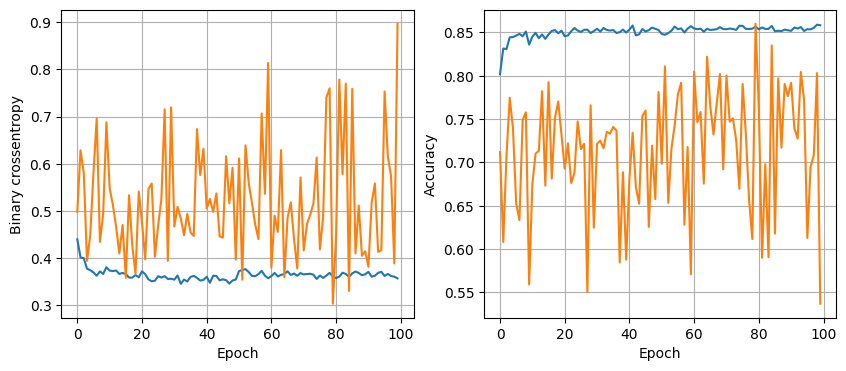

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8151 - loss: 0.4458


TypeError: '<' not supported between instances of 'list' and 'float'

In [160]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16,32,64]:
  for dropout_prob in [0,0.2]:
    for learning_rate in [0.1, 0.005, 0.001]:
      for batch_size in [32,64,128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, learning_rate {learning_rate}, batch_size {batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, learning_rate,batch_size,epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid, y_valid)

        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model


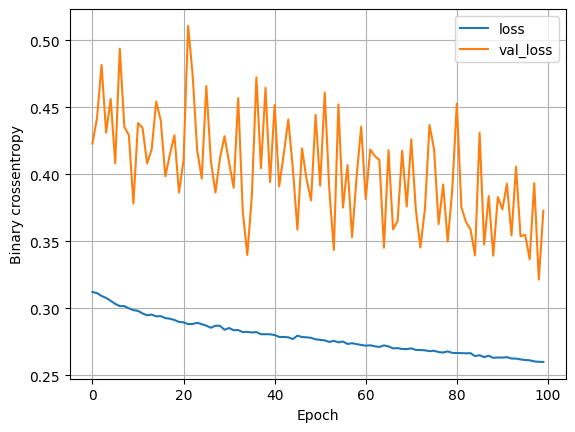

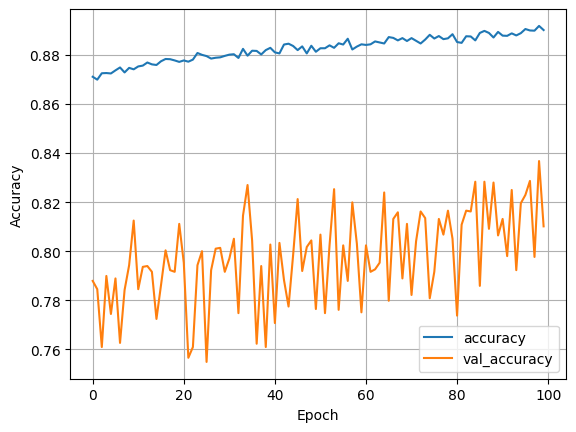

In [152]:
plot_loss(history)
plot_accuracy(history)